In [1]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Miscellaneous
import warnings
warnings.filterwarnings("ignore")

# Filter XGBoost warnings
warnings.filterwarnings('ignore', category=UserWarning, module='xgboost')

# Machine Learning Models and Utilities
from sklearn.preprocessing import LabelBinarizer, RobustScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

In [2]:
data = pd.read_csv("nasa.csv")
df = data.copy()

In [3]:
df.head()

Neo Reference ID     Name  Absolute Magnitude  Est Dia in KM(min)  \
0           3703080  3703080                21.6            0.127220   
1           3723955  3723955                21.3            0.146068   
2           2446862  2446862                20.3            0.231502   
3           3092506  3092506                27.4            0.008801   
4           3514799  3514799                21.6            0.127220   

   Est Dia in KM(max)  Est Dia in M(min)  Est Dia in M(max)  \
0            0.284472         127.219879         284.472297   
1            0.326618         146.067964         326.617897   
2            0.517654         231.502122         517.654482   
3            0.019681           8.801465          19.680675   
4            0.284472         127.219879         284.472297   

   Est Dia in Miles(min)  Est Dia in Miles(max)  Est Dia in Feet(min)  ...  \
0               0.079051               0.176763            417.388066  ...   
1               0.090762               0.202951            479.225620  ...   
2               0.143849               0.321655            759.521423  ...   
3               0.005469               0.012229             28.876199  ...   
4               0.079051               0.176763            417.388066  ...   

   Asc Node Longitude Orbital Period  Perihelion Distance  Perihelion Arg  \
0          314.373913     609.599786             0.808259       57.257470   
1          136.717242     425.869294             0.718200      313.091975   
2          259.475979     643.580228             0.950791      248.415038   
3           57.173266     514.082140             0.983902       18.707701   
4           84.629307     495.597821             0.967687      158.263596   

   Aphelion Dist  Perihelion Time  Mean Anomaly  Mean Motion  Equinox  \
0       2.005764     2.458162e+06    264.837533     0.590551    J2000   
1       1.497352     2.457795e+06    173.741112     0.845330    J2000   
2       1.966857     2.458120e+06    292.893654     0.559371    J2000   
3       1.527904     2.457902e+06     68.741007     0.700277    J2000   
4       1.483543     2.457814e+06    135.142133     0.726395    J2000   

   Hazardous  
0       True  
1      False  
2       True  
3      False  
4       True  

[5 rows x 40 columns]

In [4]:
df.isnull().sum().sum()

0

In [5]:
df.duplicated().sum()

0

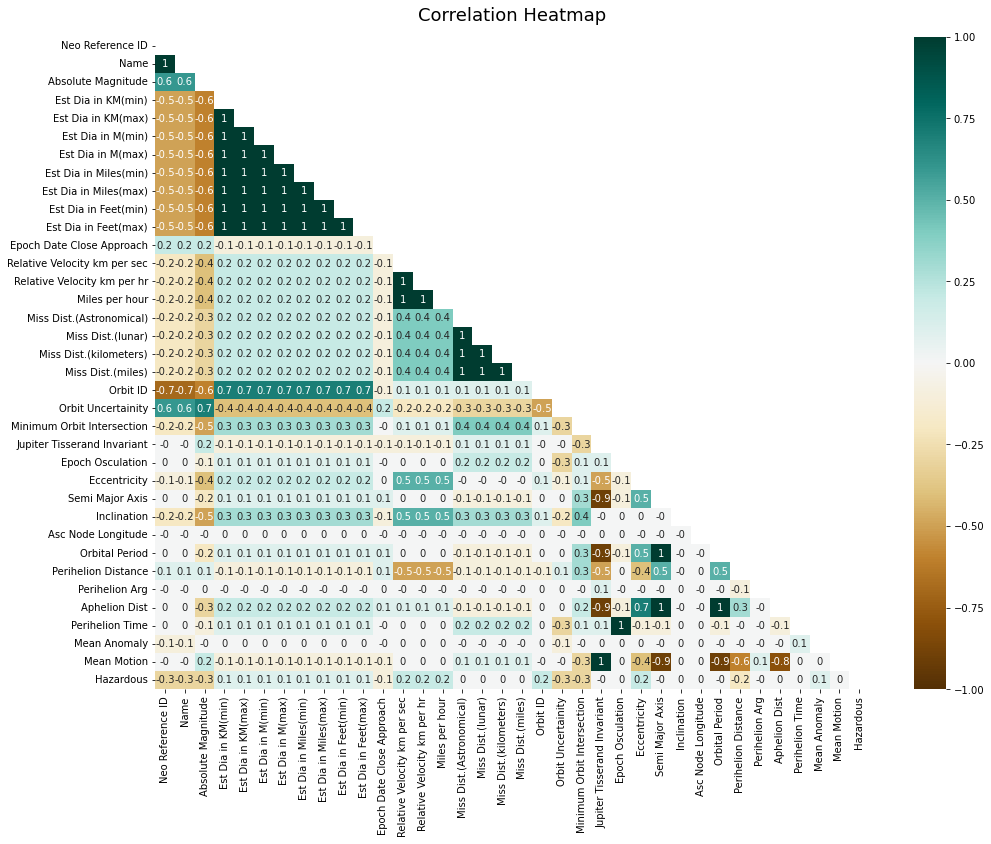

In [6]:
plt.figure(figsize=(16, 12))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(round(df.corr(),1), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [7]:
df.columns

Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox', 'Hazardous'],
      dtype='object')

In [8]:
drop_cols= ['Est Dia in M(min)', 'Est Dia in M(max)','Est Dia in Miles(min)', 'Est Dia in Miles(max)','Est Dia in Feet(min)', 'Est Dia in Feet(max)','Relative Velocity km per hr', 'Miles per hour','Miss Dist.(lunar)','Miss Dist.(miles)','Miss Dist.(Astronomical)']

In [9]:
df.drop(labels=drop_cols, axis=1, inplace=True)

In [10]:
df.head()

Neo Reference ID     Name  Absolute Magnitude  Est Dia in KM(min)  \
0           3703080  3703080                21.6            0.127220   
1           3723955  3723955                21.3            0.146068   
2           2446862  2446862                20.3            0.231502   
3           3092506  3092506                27.4            0.008801   
4           3514799  3514799                21.6            0.127220   

   Est Dia in KM(max) Close Approach Date  Epoch Date Close Approach  \
0            0.284472          1995-01-01               788947200000   
1            0.326618          1995-01-01               788947200000   
2            0.517654          1995-01-08               789552000000   
3            0.019681          1995-01-15               790156800000   
4            0.284472          1995-01-15               790156800000   

   Relative Velocity km per sec  Miss Dist.(kilometers) Orbiting Body  ...  \
0                      6.115834              62753692.0         Earth  ...   
1                     18.113985              57298148.0         Earth  ...   
2                      7.590711               7622911.5         Earth  ...   
3                     11.173874              42683616.0         Earth  ...   
4                      9.840831              61010824.0         Earth  ...   

   Asc Node Longitude Orbital Period  Perihelion Distance  Perihelion Arg  \
0          314.373913     609.599786             0.808259       57.257470   
1          136.717242     425.869294             0.718200      313.091975   
2          259.475979     643.580228             0.950791      248.415038   
3           57.173266     514.082140             0.983902       18.707701   
4           84.629307     495.597821             0.967687      158.263596   

   Aphelion Dist  Perihelion Time  Mean Anomaly  Mean Motion  Equinox  \
0       2.005764     2.458162e+06    264.837533     0.590551    J2000   
1       1.497352     2.457795e+06    173.741112     0.845330    J2000   
2       1.966857     2.458120e+06    292.893654     0.559371    J2000   
3       1.527904     2.457902e+06     68.741007     0.700277    J2000   
4       1.483543     2.457814e+06    135.142133     0.726395    J2000   

   Hazardous  
0       True  
1      False  
2       True  
3      False  
4       True  

[5 rows x 29 columns]

In [11]:
df.shape

(4687, 29)

In [12]:
df.nunique()

Neo Reference ID                3692
Name                            3692
Absolute Magnitude               269
Est Dia in KM(min)               269
Est Dia in KM(max)               269
Close Approach Date              777
Epoch Date Close Approach        777
Relative Velocity km per sec    4687
Miss Dist.(kilometers)          4661
Orbiting Body                      1
Orbit ID                         188
Orbit Determination Date        2680
Orbit Uncertainity                10
Minimum Orbit Intersection      3678
Jupiter Tisserand Invariant     2495
Epoch Osculation                 429
Eccentricity                    3692
Semi Major Axis                 3692
Inclination                     3692
Asc Node Longitude              3692
Orbital Period                  3692
Perihelion Distance             3692
Perihelion Arg                  3692
Aphelion Dist                   3692
Perihelion Time                 3692
Mean Anomaly                    3692
Mean Motion                     3692
E

In [13]:
df['Epoch Osculation'].value_counts()

2458000.5    4048
2457600.5      64
2457800.5      55
2455707.5       5
2457431.5       4
             ... 
2454806.5       1
2454791.5       1
2454765.5       1
2454768.5       1
2457637.5       1
Name: Epoch Osculation, Length: 429, dtype: int64

In [14]:
 df.drop(['Equinox','Orbiting Body', 'Neo Reference ID','Name','Close Approach Date', 'Orbit Determination Date'], axis=1, inplace=True)

In [15]:
df.columns=df.columns.str.replace(' ', '_')
df.head()

Absolute_Magnitude  Est_Dia_in_KM(min)  Est_Dia_in_KM(max)  \
0                21.6            0.127220            0.284472   
1                21.3            0.146068            0.326618   
2                20.3            0.231502            0.517654   
3                27.4            0.008801            0.019681   
4                21.6            0.127220            0.284472   

   Epoch_Date_Close_Approach  Relative_Velocity_km_per_sec  \
0               788947200000                      6.115834   
1               788947200000                     18.113985   
2               789552000000                      7.590711   
3               790156800000                     11.173874   
4               790156800000                      9.840831   

   Miss_Dist.(kilometers)  Orbit_ID  Orbit_Uncertainity  \
0              62753692.0        17                   5   
1              57298148.0        21                   3   
2               7622911.5        22                   0   
3              42683616.0         7                   6   
4              61010824.0        25                   1   

   Minimum_Orbit_Intersection  Jupiter_Tisserand_Invariant  ...  Inclination  \
0                    0.025282                        4.634  ...     6.025981   
1                    0.186935                        5.457  ...    28.412996   
2                    0.043058                        4.557  ...     4.237961   
3                    0.005512                        5.093  ...     7.905894   
4                    0.034798                        5.154  ...    16.793382   

   Asc_Node_Longitude  Orbital_Period  Perihelion_Distance  Perihelion_Arg  \
0          314.373913      609.599786             0.808259       57.257470   
1          136.717242      425.869294             0.718200      313.091975   
2          259.475979      643.580228             0.950791      248.415038   
3           57.173266      514.082140             0.983902       18.707701   
4           84.629307      495.597821             0.967687      158.263596   

   Aphelion_Dist  Perihelion_Time  Mean_Anomaly  Mean_Motion  Hazardous  
0       2.005764     2.458162e+06    264.837533     0.590551       True  
1       1.497352     2.457795e+06    173.741112     0.845330      False  
2       1.966857     2.458120e+06    292.893654     0.559371       True  
3       1.527904     2.457902e+06     68.741007     0.700277      False  
4       1.483543     2.457814e+06    135.142133     0.726395       True  

[5 rows x 23 columns]

In [16]:
encoder = LabelBinarizer()

In [17]:
df["Hazardous"] = encoder.fit_transform(df["Hazardous"])

In [18]:
df.head()

Absolute_Magnitude  Est_Dia_in_KM(min)  Est_Dia_in_KM(max)  \
0                21.6            0.127220            0.284472   
1                21.3            0.146068            0.326618   
2                20.3            0.231502            0.517654   
3                27.4            0.008801            0.019681   
4                21.6            0.127220            0.284472   

   Epoch_Date_Close_Approach  Relative_Velocity_km_per_sec  \
0               788947200000                      6.115834   
1               788947200000                     18.113985   
2               789552000000                      7.590711   
3               790156800000                     11.173874   
4               790156800000                      9.840831   

   Miss_Dist.(kilometers)  Orbit_ID  Orbit_Uncertainity  \
0              62753692.0        17                   5   
1              57298148.0        21                   3   
2               7622911.5        22                   0   
3              42683616.0         7                   6   
4              61010824.0        25                   1   

   Minimum_Orbit_Intersection  Jupiter_Tisserand_Invariant  ...  Inclination  \
0                    0.025282                        4.634  ...     6.025981   
1                    0.186935                        5.457  ...    28.412996   
2                    0.043058                        4.557  ...     4.237961   
3                    0.005512                        5.093  ...     7.905894   
4                    0.034798                        5.154  ...    16.793382   

   Asc_Node_Longitude  Orbital_Period  Perihelion_Distance  Perihelion_Arg  \
0          314.373913      609.599786             0.808259       57.257470   
1          136.717242      425.869294             0.718200      313.091975   
2          259.475979      643.580228             0.950791      248.415038   
3           57.173266      514.082140             0.983902       18.707701   
4           84.629307      495.597821             0.967687      158.263596   

   Aphelion_Dist  Perihelion_Time  Mean_Anomaly  Mean_Motion  Hazardous  
0       2.005764     2.458162e+06    264.837533     0.590551          1  
1       1.497352     2.457795e+06    173.741112     0.845330          0  
2       1.966857     2.458120e+06    292.893654     0.559371          1  
3       1.527904     2.457902e+06     68.741007     0.700277          0  
4       1.483543     2.457814e+06    135.142133     0.726395          1  

[5 rows x 23 columns]

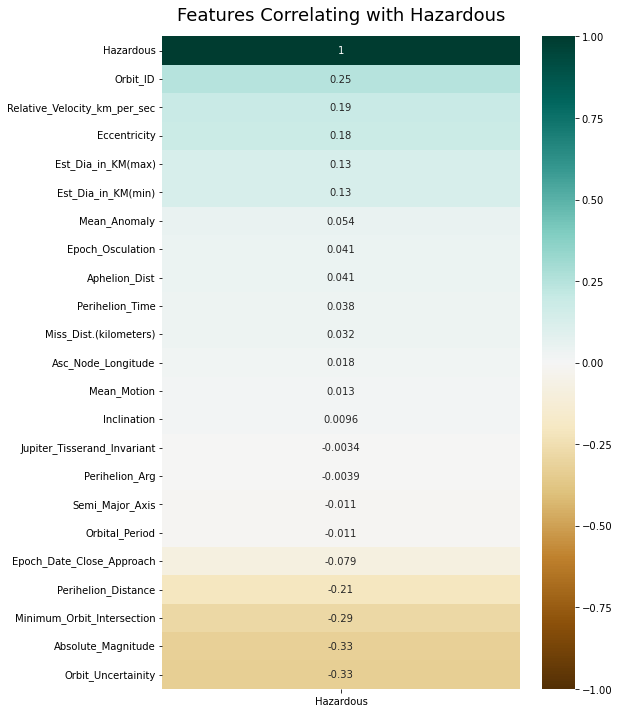

In [19]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['Hazardous']].sort_values(by='Hazardous', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Hazardous', fontdict={'fontsize':18}, pad=16);

In [20]:
df.Hazardous.value_counts()

0    3932
1     755
Name: Hazardous, dtype: int64

In [21]:
X = df.drop("Hazardous", axis=1)
y = df.Hazardous

In [22]:
scaler = RobustScaler()
X_columns = X.columns
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=X_columns)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size= 0.2, random_state=123)

In [24]:
xgb = XGBClassifier(use_label_encoder=False)
xgb_pred_train = xgb.fit(X_train, y_train).predict(X_train)
xgb_pred_test = xgb.predict(X_test)

In [25]:
xgb_prob_pred = xgb.predict_proba(X_test)

In [26]:
xgb_pred_test

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,

In [27]:
xgb_prob_pred

array([[1.4343858e-03, 9.9856561e-01],
       [9.9948531e-01, 5.1471218e-04],
       [9.9994934e-01, 5.0655919e-05],
       ...,
       [9.9977016e-01, 2.2985051e-04],
       [9.9977130e-01, 2.2869369e-04],
       [9.9992698e-01, 7.3028925e-05]], dtype=float32)

In [28]:
print(classification_report(xgb_pred_train, y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3145
           1       1.00      1.00      1.00       604

    accuracy                           1.00      3749
   macro avg       1.00      1.00      1.00      3749
weighted avg       1.00      1.00      1.00      3749



In [29]:
print(classification_report(xgb_pred_test, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       785
           1       1.00      0.99      0.99       153

    accuracy                           1.00       938
   macro avg       1.00      0.99      1.00       938
weighted avg       1.00      1.00      1.00       938



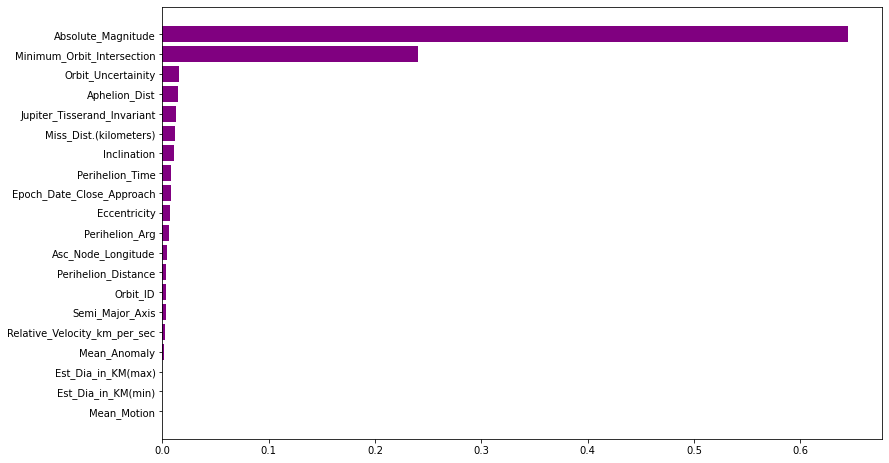

In [30]:
Importance=pd.DataFrame({
    "Features":xgb.feature_importances_
},index=X_train.columns)
data=Importance.sort_values(by="Features",axis=0,ascending=True)
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])

ax.barh(data.index[-20:],data.Features[-20:],color="purple")
plt.show()

In [31]:
model = XGBClassifier(ref_alpha=None, random_state=123)

In [32]:
#Setting the search space 
search_spaces = {'learning_rate' : Real(0.01, 1.0, 'uniform'),
                 'max_depth' : Integer(2,12), 
                 'subsample' : Real(0.1, 1.0, 'uniform'), 
                 'colsample_bytree' :Real(0.1, 1.0, 'uniform'), #subsample ratio of columns by tree
                 'reg_lambda' : Real(1e-9, 100., 'uniform'), # L2 regularization
                 'ref_alpha' : Real(1e-9, 100., 'uniform'),  # L1 regularization
                 'n_estimators' : Integer(50,5000)
                }

In [33]:
# Wrapping Everything up into the Bayesian optimizer 

opt = BayesSearchCV(estimator=model,
                    search_spaces=search_spaces, 
                    scoring="accuracy",
                    n_iter=11, # max number of trials
                    n_points=1, # number of hyperparameter sets evaluated at the same time
                    n_jobs=1, # number of jobs
                    return_train_score=False, 
                    refit=False, 
                    optimizer_kwargs= {'base_estimator': 'GP'}, # optimizer parameters: we use Guassian Process
                    random_state =123)                           # random state for replicability
                    

In [34]:
_=opt.fit(X_train, y_train)

[16:39:32] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "ref_alpha" } are not used.

[16:39:36] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "ref_alpha" } are not used.

[16:39:39] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "ref_alpha" } are not used.

[16:39:42] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "ref_alpha" } are not used.

[16:39:44] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "ref_alpha" } are not used.

[16:39:47] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.maco

In [35]:
print(opt.best_params_)

OrderedDict([('colsample_bytree', 0.9932662966595065), ('learning_rate', 0.7654571497172622), ('max_depth', 10), ('n_estimators', 167), ('ref_alpha', 49.1984040657159), ('reg_lambda', 18.214961552568017), ('subsample', 0.6528406791082417)])


In [36]:
boosted_xgb = XGBClassifier(colsample_bytree=0.606353426143548, random_state=123, learning_rate=0.36056343563755416, max_depth=6,
             n_estimators=3210, ref_alpha=59.89935817684392, reg_lambda=36.270889423953335, subsample=0.3668457253360634)

In [37]:
y_pred_train_boosted = boosted_xgb.fit(X_train, y_train).predict(X_train)

[16:42:02] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "ref_alpha" } are not used.



In [38]:
print(classification_report(y_pred_train_boosted, y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3144
           1       1.00      1.00      1.00       605

    accuracy                           1.00      3749
   macro avg       1.00      1.00      1.00      3749
weighted avg       1.00      1.00      1.00      3749



In [39]:
y_pred_test_boosted = boosted_xgb.fit(X_train, y_train).predict(X_test)

[16:42:06] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "ref_alpha" } are not used.



In [40]:
print(classification_report(y_pred_test_boosted, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       786
           1       0.99      0.99      0.99       152

    accuracy                           1.00       938
   macro avg       1.00      0.99      0.99       938
weighted avg       1.00      1.00      1.00       938

